# Preamble
**Name:** Deborah Djon</br>
**Student Number:** 22261972</br>
**Module Code:** CA694</br>
**Module Name:** Practicum</br>
**Supervisor:** Dr. Geoff Hamilton</br>

## **Plagiarism Policy**
I declare that this material, which I now submit for assessment, is entirely my own work and has not been taken from the work of others, save and to the extent that such work has been cited and acknowledged within the text of my work. I understand that plagiarism, collusion, and copying are grave and serious offences in the university and accept the penalties that would be imposed should I engage in plagiarism, collusion or copying. I have read and understood the Assignment Regulations. I have identified and included the source of all facts, ideas, opinions, and viewpoints of others in the assignment references. Direct quotations from books, journal articles, internet sources, module text, or any other source whatsoever are acknowledged and the source cited are identified in the assignment references. This assignment, or any part of it, has not been previously submitted by me or any other person for assessment on this or any other course of study.</br>

I have read and understood the referencing guidelines found at
http://www.dcu.ie/info/regulations/plagiarism.shtml,
https://www4.dcu.ie/students/az/plagiarism and/or recommended in the assignment
guidelines.

## Imports

### Libraries

In [1]:
import sys  
sys.path.insert(0, '../..')
from modelling_utilities.visualisation import *
from modelling_utilities.constants import *
from modelling_utilities.data_processing import stretch_measures_to_seconds

import os
import pandas as pd
import random

import json
import seaborn as sns
import pyarrow as pa
import pyarrow.parquet as pq

### Data

In [11]:
os.listdir(meta_data_folder)

fnf
'/Users/deborahdjon/Documents/ObsidianVaults/Notes/01_MSc_AI/CA694Practicum/MCM1_Practicum_Data/MCM1_Practicum_Data/Metadata/'
'/Users/deborahdjon/Documents/ObsidianVaults/Notes/01_MSc_AI/CA694Practicum/MCM1_Practicum_Data/Metadata'

FileNotFoundError: [Errno 2] No such file or directory: '/Users/deborahdjon/Documents/ObsidianVaults/Notes/01_MSc_AI/CA694Practicum/MCM1_Practicum_Data/MCM1_Practicum_Data/Metadata/'

In [8]:
data_folder = DATA_FOLDER
raw_folder = data_folder+"Raw_Data/"
pre_processed_folder = data_folder + "Processed_Data/"
meta_data_folder = data_folder + "Metadata/"
binned_data_folder = pre_processed_folder+"data-ms-aggregates/"

vid_map_fp = meta_data_folder+"all_ids_title_pseudonym_ids.json"
with open (vid_map_fp, "r") as f:
    vname_2_vid_map = json.load(f)
vname_2_vid_map
vid_2_vname_map = {v:k for k,v in vname_2_vid_map.items()}
vid_2_vname_map



cw =  pd.read_pickle(raw_folder+"closed_world_mega_frame.pkl")
ow = pd.read_pickle(raw_folder+"open_world_mega_frame.pkl")
cw["type"] = "closed_world"
ow["type"] = "open_world"
data = pd.concat([ow,cw])
display(data)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/deborahdjon/Documents/ObsidianVaults/Notes/01_MSc_AI/CA694Practicum/MCM1_Practicum_Data/MCM1_Practicum_Data/Metadata/all_ids_title_pseudonym_ids.json'

## Summary Statistics

In [ ]:
print("-------------------- Open world data --------------------")
print(cw.info())
display(cw.head())
print("-------------------- Closed world data ------------------")
print(ow.info())
display(ow.head())


-------------------- Open world data --------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  2500 non-null   object
 1   data       2500 non-null   object
 2   video_id   2500 non-null   object
 3   type       2500 non-null   object
dtypes: object(4)
memory usage: 78.2+ KB
None


timestamp  \
0  [2023-06-22 11:47:33.180000, 2023-06-22 11:47:...   
1  [2023-06-22 10:59:57.390000, 2023-06-22 10:59:...   
2  [2023-06-22 11:42:14.490000, 2023-06-22 11:42:...   
3  [2023-06-22 12:14:02.060000, 2023-06-22 12:14:...   
4  [2023-06-22 12:03:27.860000, 2023-06-22 12:03:...   

                                                data     video_id  \
0  [0.0, 0.0, 5861.0, 5861.0, 5890.0, 72784.0, 11...  3IosA_ir06Y   
1  [5861.0, 5861.0, 5932.0, 72784.0, 25446.0, 567...  3IosA_ir06Y   
2  [0.0, 5861.0, 5664.0, 5861.0, 72784.0, 11322.0...  3IosA_ir06Y   
3  [0.0, 5861.0, 5861.0, 72784.0, 6067.0, 25446.0...  3IosA_ir06Y   
4  [0.0, 5861.0, 5861.0, 7479.0, 7392.0, 26827.0,...  3IosA_ir06Y   

           type  
0  closed_world  
1  closed_world  
2  closed_world  
3  closed_world  
4  closed_world

-------------------- Closed world data ------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3789 entries, 0 to 3788
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  3789 non-null   object
 1   data       3789 non-null   object
 2   video_id   3789 non-null   object
 3   type       3789 non-null   object
dtypes: object(4)
memory usage: 118.5+ KB
None


timestamp  \
0  [2023-06-27 23:39:18.500000, 2023-06-27 23:39:...   
1  [2023-06-30 00:21:10.750000, 2023-06-30 00:21:...   
2  [2023-06-28 00:36:21.290000, 2023-06-28 00:36:...   
3  [2023-06-26 18:13:43.080000, 2023-06-26 18:13:...   
4  [2023-06-26 18:10:42.830000, 2023-06-26 18:10:...   

                                                data     video_id        type  
0  [965.0, 55313.0, 61373.0, 10066.0, 10047.0, 10...  pxZdo1n4pME  open_world  
1  [44004.0, 7702.0, 61608.0, 438780.0, 553869.0,...  cTuBm4imTcE  open_world  
2  [965.0, 5529.0, 61371.0, 6390.0, 7349.0, 5862....  BtnXRoKhURs  open_world  
3  [17942.0, 61268.0, 14519.0, 14033.0, 701.0, 70...  OB0gPldTIy4  open_world  
4  [991.0, 61266.0, 702.0, 702.0, 5861.0, 5861.0,...  YgA3uFJ5Hgs  open_world

## Visualisations

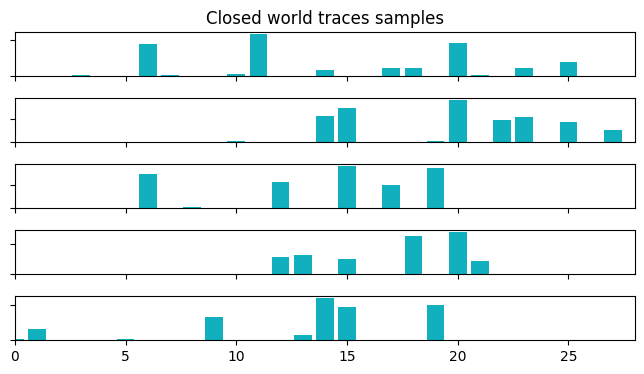

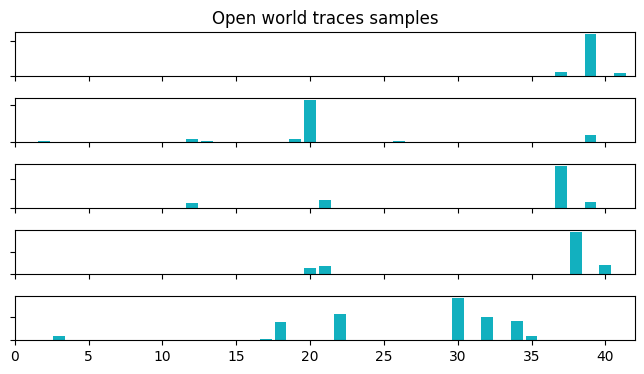

In [ ]:
# Sample traces
samples_ow = ow.sample(5)
samples_cw = cw.sample(5)

show_traces(traces=samples_cw.data.to_list(), title="Closed world traces samples")
show_traces(traces=samples_ow.data.to_list(), title="Open world traces samples")

<Axes: >

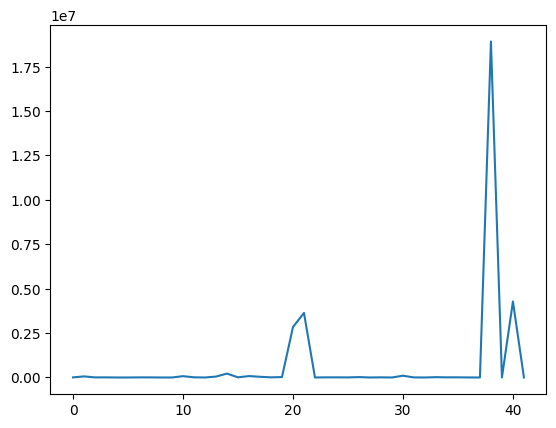

In [ ]:
pd.Series(samples_ow.iloc[3]["data"]).plot()

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

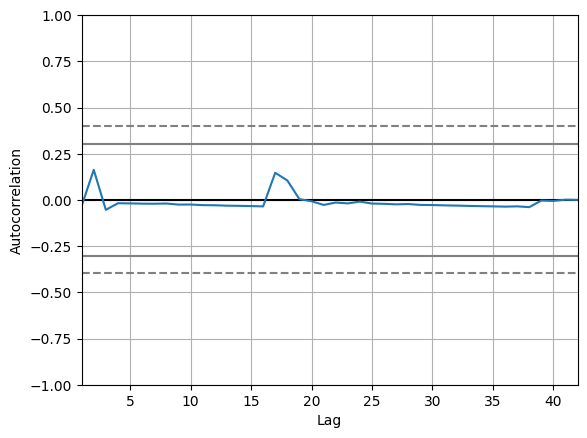

In [ ]:
pd.plotting.autocorrelation_plot(pd.Series(samples_ow.iloc[3]["data"]))

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

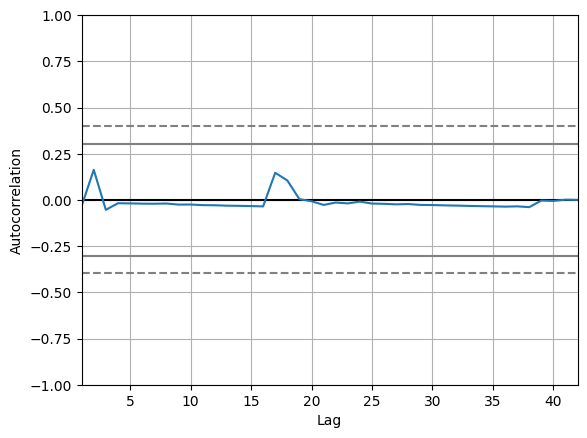

In [ ]:
pd.plotting.autocorrelation_plot(pd.Series(samples_ow.iloc[3]["data"]))

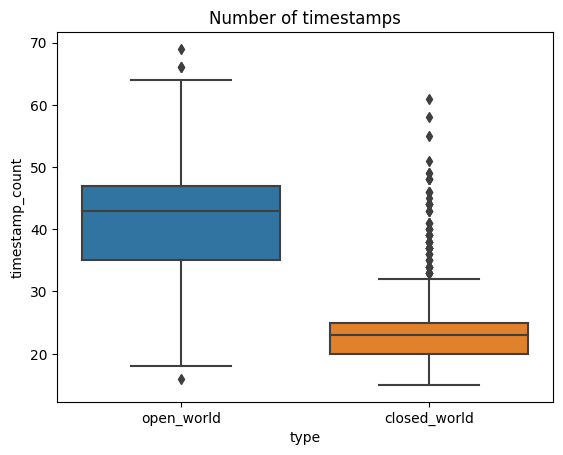

Number of timestamps equals number of datapoints: True


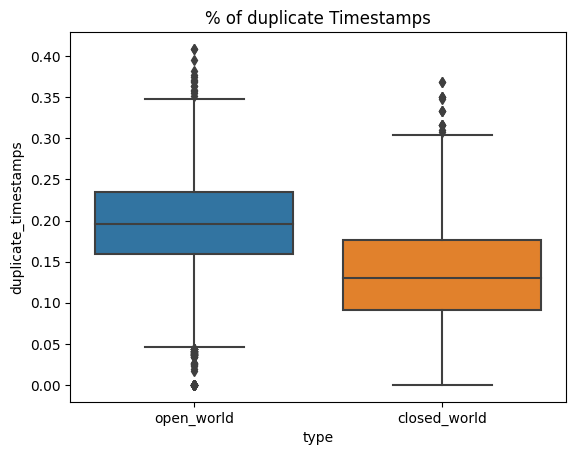

In [ ]:
# All closed world traces
data["timestamp_count"] = data["timestamp"].apply(len)
data["timestamp_unique_count"] = data["timestamp"].apply(set).apply(len)

data["data_count"] = data["timestamp"].apply(len)
data["data_unique_count"] = data["data"].apply(set).apply(len)

x = sns.boxplot(data=data, y="timestamp_count",  x="type")
x.set_title("Number of timestamps")
plt.show()
data_ts_validation = data["timestamp_count"] == data["data_count"] 
data_ts_validation = sum(data_ts_validation)/len(data_ts_validation)
print("Number of timestamps equals number of datapoints:", bool(data_ts_validation))

data["duplicate_timestamps"] = 1 - data["timestamp_unique_count"] / data["timestamp_count"] 
x = sns.boxplot(data=data, y="duplicate_timestamps", x="type")
x.set_title("% of duplicate Timestamps")
plt.show()

# data["duplicate_datapoints"] = 1 - data["data_unique_count"] / data["data_count"] 
# x = sns.boxplot(data=data, y="duplicate_datapoints",  x="type")
# x.set_title("% of duplicate Data Points")
# plt.show()

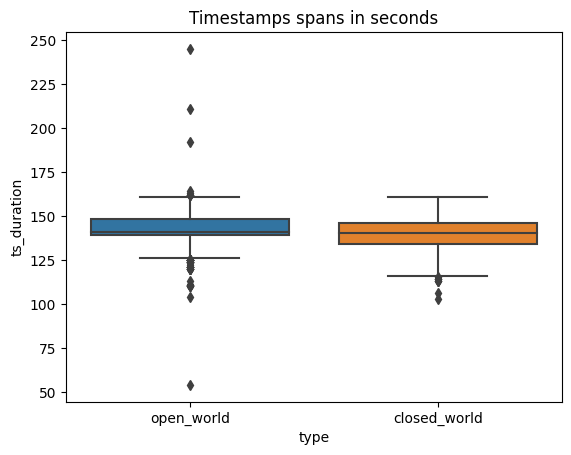

In [ ]:
# Trace dimestamp delta
data["ts_start"] = data["timestamp"].apply(lambda x: min(x))
data["ts_end"] = data["timestamp"].apply(lambda x: max(x))
data["ts_duration"]  = (data["ts_end"] - data["ts_start"]).apply(lambda x: x.seconds)

x = sns.boxplot(data=data, y="ts_duration", x="type")
x.set_title("Timestamps spans in seconds")
plt.show()


In [ ]:
cw
video_ids = cw.index.tolist()
cw["video_title"]  = cw["video_id"].map(vid_2_vname_map)
cw["vnum"] =  cw["video_title"].apply(lambda x: int(x[-2:]))
cw = cw.sort_values("vnum")
cw

timestamp  \
0     [2023-06-22 11:47:33.180000, 2023-06-22 11:47:...   
27    [2023-06-22 11:26:27.650000, 2023-06-22 11:26:...   
28    [2023-06-22 10:46:43.910000, 2023-06-22 10:46:...   
29    [2023-06-22 11:36:52.010000, 2023-06-22 11:37:...   
30    [2023-06-22 12:37:54.690000, 2023-06-22 12:37:...   
...                                                 ...   
2469  [2023-06-22 06:55:12.320000, 2023-06-22 06:55:...   
2470  [2023-06-22 08:01:27.540000, 2023-06-22 08:01:...   
2471  [2023-06-22 06:39:19.420000, 2023-06-22 06:39:...   
2460  [2023-06-22 07:58:48.270000, 2023-06-22 07:58:...   
2499  [2023-06-22 06:28:44.950000, 2023-06-22 06:28:...   

                                                   data     video_id  \
0     [0.0, 0.0, 5861.0, 5861.0, 5890.0, 72784.0, 11...  3IosA_ir06Y   
27    [72784.0, 5923.0, 5861.0, 5861.0, 25446.0, 268...  3IosA_ir06Y   
28    [5861.0, 72784.0, 5861.0, 5828.0, 25446.0, 113...  3IosA_ir06Y   
29    [0.0, 72784.0, 5861.0, 5861.0, 25446.0, 6066.0...  3IosA_ir06Y   
30    [0.0, 0.0, 5861.0, 5861.0, 72784.0, 5767.0, 25...  3IosA_ir06Y   
...                                                 ...          ...   
2469  [0.0, 5861.0, 72757.0, 5861.0, 6005.0, 17722.0...  RvxefSebjYE   
2470  [0.0, 5861.0, 885.0, 72757.0, 5532.0, 17724.0,...  RvxefSebjYE   
2471  [0.0, 885.0, 5861.0, 5772.0, 72757.0, 17722.0,...  RvxefSebjYE   
2460  [0.0, 5861.0, 72757.0, 885.0, 6082.0, 17750.0,...  RvxefSebjYE   
2499  [0.0, 0.0, 5861.0, 5861.0, 5742.0, 72757.0, 17...  RvxefSebjYE   

              type video_title  vnum  
0     closed_world     Video 1     1  
27    closed_world     Video 1     1  
28    closed_world     Video 1     1  
29    closed_world     Video 1     1  
30    closed_world     Video 1     1  
...            ...         ...   ...  
2469  closed_world    Video 50    50  
2470  closed_world    Video 50    50  
2471  closed_world    Video 50    50  
2460  closed_world    Video 50    50  
2499  closed_world    Video 50    50  

[2500 rows x 6 columns]

In [ ]:
bc_data = cw[["data", "video_title", "vnum"]]
bc_data["data"] = bc_data["data"].apply(lambda x: [x])
bc_data = bc_data.groupby("video_title").sum()
bc_data["vnum"] = bc_data["vnum"]/50
bc_data = bc_data.sort_values("vnum")
bc_data.drop("vnum", axis=1, inplace=True)
bc_data

/tmp/ipykernel_50600/1749489963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_data["data"] = bc_data["data"].apply(lambda x: [x])


data
video_title                                                   
Video 1      [[0.0, 0.0, 5861.0, 5861.0, 5890.0, 72784.0, 1...
Video 2      [[0.0, 5860.0, 5860.0, 5744.0, 26825.0, 5124.0...
Video 3      [[73532.0, 437775.0, 11888.0, 5860.0, 5860.0, ...
Video 4      [[0.0, 5860.0, 5860.0, 72750.0, 5778.0, 35392....
Video 5      [[0.0, 5860.0, 5860.0, 5798.0, 33954.0, 164567...
Video 6      [[0.0, 0.0, 5860.0, 5627.0, 35283.0, 26825.0, ...
Video 7      [[0.0, 5860.0, 5860.0, 72682.0, 5878.0, 26826....
Video 8      [[0.0, 5860.0, 5860.0, 74229.0, 5764.0, 11321....
Video 9      [[33628.0, 42533.0, 5860.0, 701.0, 7492.0, 586...
Video 10     [[0.0, 72955.0, 5861.0, 5861.0, 5971.0, 1802.0...
Video 11     [[0.0, 5861.0, 5861.0, 72785.0, 5765.0, 26827....
Video 12     [[0.0, 5863.0, 5863.0, 73256.0, 5736.0, 34415....
Video 13     [[0.0, 7495.0, 885.0, 5863.0, 5733.0, 34754.0,...
Video 14     [[0.0, 5861.0, 5861.0, 73193.0, 6053.0, 26826....
Video 15     [[5861.0, 5861.0, 72957.0, 11324.0, 5761.0, 35...
Video 16     [[0.0, 5747.0, 73382.0, 26826.0, 129334.0, 334...
Video 17     [[0.0, 5861.0, 5861.0, 6084.0, 2143661.0, 7277...
Video 18     [[0.0, 73324.0, 5498.0, 5101.0, 35127.0, 26827...
Video 19     [[0.0, 448484.0, 67945.0, 5808.0, 5041.0, 3461...
Video 20     [[0.0, 5861.0, 5861.0, 72768.0, 6061.0, 245490...
Video 21     [[0.0, 5861.0, 5861.0, 73006.0, 5940.0, 34898....
Video 22     [[0.0, 5863.0, 5863.0, 6244.0, 26827.0, 51673....
Video 23     [[0.0, 926025.0, 5863.0, 5863.0, 9989.0, 11324...
Video 24     [[0.0, 5860.0, 5860.0, 2569.0, 75057.0, 58467....
Video 25     [[0.0, 5861.0, 5861.0, 73890.0, 5797.0, 1453.0...
Video 26     [[2815636.0, 0.0, 5861.0, 5861.0, 5727.0, 6763...
Video 27     [[0.0, 5863.0, 5863.0, 74653.0, 5772.0, 14568....
Video 28     [[0.0, 5861.0, 885.0, 74281.0, 6228.0, 11322.0...
Video 29     [[0.0, 5863.0, 5863.0, 73582.0, 6111.0, 112294...
Video 30     [[0.0, 5861.0, 5861.0, 72869.0, 5836.0, 26825....
Video 31     [[0.0, 5861.0, 5861.0, 72700.0, 5617.0, 11322....
Video 32     [[0.0, 5861.0, 5861.0, 5689.0, 73006.0, 5076.0...
Video 33     [[0.0, 0.0, 1612494.0, 8178.0, 5823.0, 1326256...
Video 34     [[0.0, 5861.0, 5861.0, 73091.0, 6171.0, 35243....
Video 35     [[0.0, 73622.0, 5767.0, 11324.0, 22823.0, 3488...
Video 36     [[0.0, 5861.0, 5861.0, 72836.0, 5862.0, 43303....
Video 37     [[0.0, 5863.0, 885.0, 74028.0, 5781.0, 26827.0...
Video 38     [[0.0, 5863.0, 5863.0, 72753.0, 6077.0, 1452.0...
Video 39     [[0.0, 1932788.0, 68897.0, 5958.0, 2981.0, 268...
Video 40     [[73358.0, 5715.0, 1802.0, 57688.0, 269421.0, ...
Video 41     [[0.0, 0.0, 73696.0, 5896.0, 5861.0, 5861.0, 5...
Video 42     [[1013732.0, 5619.0, 26827.0, 112893.0, 5355.0...
Video 43     [[0.0, 73588.0, 5552.0, 344269.0, 5031.0, 2682...
Video 44     [[0.0, 0.0, 5861.0, 5861.0, 72683.0, 5931.0, 3...
Video 45     [[5861.0, 72853.0, 885.0, 11322.0, 5836.0, 268...
Video 46     [[0.0, 1532837.0, 5861.0, 5861.0, 7398.0, 5824...
Video 47     [[0.0, 5861.0, 75330.0, 885.0, 5891.0, 183621....
Video 48     [[5860.0, 5860.0, 73498.0, 26930.0, 5010.0, 39...
Video 49     [[0.0, 5861.0, 5861.0, 105964.0, 5849.0, 34621...
Video 50     [[0.0, 5861.0, 5999.0, 5861.0, 72757.0, 17722....

DBA (vectorized version of Petitjean's EM)


/home/deborahdarragh/Documents/Gitlab_Deborah/youtube_video_detector/Workbooks/Data_Analysis_and_Pre_Processing/../../modelling_utilities/visualisation.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


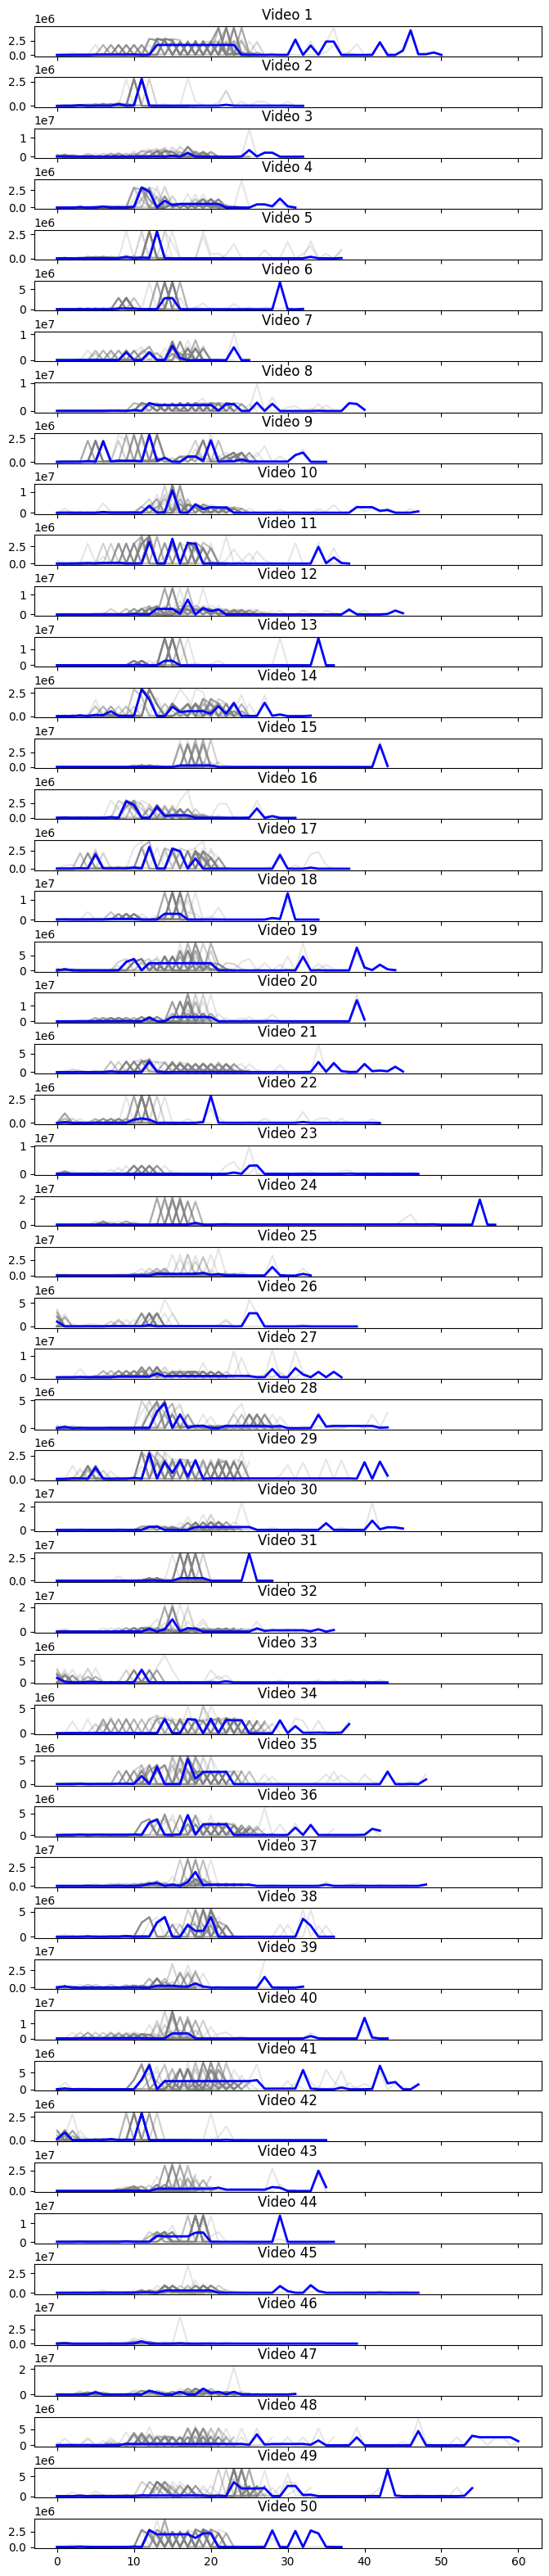

In [ ]:
# Visible pattern in the traces

plot_barycenters(sequences=bc_data["data"].to_list(), sequences_names=bc_data.index.to_list())

In [ ]:
ms=10
fn = binned_data_folder+f"data-{str(ms).zfill(4)}-ms-aggregate.parquet"
parquet_table = pq.read_table(fn)
df = parquet_table.to_pandas()

In [ ]:
features = list( df.columns[2:])

In [ ]:
bc_data = df[["video_id"]+features]

for f in features: 
    bc_data[f] = bc_data[f].apply(lambda x: [x])
bc_data = bc_data.groupby("video_id").sum()
bc_data["video_title"]  = bc_data.index.map(vid_2_vname_map)


bc_data["vnum"] =  bc_data["video_title"].apply(lambda x: int(x[-2:]))



bc_data["vnum"] = bc_data["vnum"]/50
bc_data = bc_data.sort_values("vnum")
bc_data.drop("vnum", axis=1, inplace=True)
bc_data


/tmp/ipykernel_50600/2746119267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_data[f] = bc_data[f].apply(lambda x: [x])
/tmp/ipykernel_50600/2746119267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bc_data[f] = bc_data[f].apply(lambda x: [x])
/tmp/ipykernel_50600/2746119267.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

bpts  \
video_id                                                         
3IosA_ir06Y  [[5861.0, 5861.0, 5890.0, 72784.0, 11322.0, 25...   
bhpTZOqXRN0  [[885.0, 5860.0, 73338.0, 5724.0, 34657.0, 268...   
agTMr9qITlI  [[72971.0, 1084654.0, 5860.0, 15734.0, 5860.0,...   
sFEYQMrWNHU  [[5860.0, 5860.0, 72750.0, 5899.0, 35203.0, 29...   
KUXS5fJPFSA  [[5860.0, 5860.0, 5781.0, 11321.0, 163662.0, 3...   
BuwLLUzp7DI  [[5860.0, 6153.0, 5145.0, 34781.0, 198763.0, 3...   
xYcHxF_cO8o  [[5860.0, 5860.0, 5846.0, 72682.0, 26826.0, 17...   
ZI9Fjo8k618  [[885.0, 5860.0, 74229.0, 5619.0, 5667.0, 2682...   
beHTyPTJzlQ  [[72716.0, 5860.0, 5860.0, 5874.0, 1803.0, 222...   
JZ1ZoR0Y4SU  [[72955.0, 885.0, 5861.0, 5927.0, 1803.0, 3500...   
WAfJpyBgcgA  [[5861.0, 72785.0, 5722.0, 5861.0, 131027.0, 5...   
aQDXXSh1psg  [[76424.0, 5863.0, 5863.0, 5821.0, 34415.0, 50...   
cicNiSBsDGI  [[5863.0, 5806.0, 5863.0, 291105.0, 132898.0, ...   
xF_lJGizHOY  [[5861.0, 5861.0, 73193.0, 6141.0, 34302.0, 15...   
WwAkT9Wk9Gk  [[702.0, 5861.0, 11322.0, 5861.0, 72957.0, 573...   
wqGLislwe2M  [[68406.0, 5779.0, 26826.0, 127058.0, 19862.0,...   
ECnC3Meyff4  [[885.0, 5776.0, 5861.0, 72777.0, 2143661.0, 4...   
buVYv-3f2Kc  [[73324.0, 5958.0, 26827.0, 5173.0, 21286.0, 3...   
b7v5XDJrH5g  [[5980.0, 68627.0, 165259.0, 26827.0, 35459.0,...   
RvrSoAzXVsE  [[5861.0, 5861.0, 72768.0, 5789.0, 35189.0, 26...   
tmlMwjkShLE  [[5861.0, 5861.0, 73006.0, 5855.0, 26824.0, 23...   
sQn_tYguBIY  [[73125.0, 5863.0, 5863.0, 5611.0, 26827.0, 52...   
i8UNGbSHv6U  [[212.0, 434350.0, 10671.0, 5842.0, 5212.0, 35...   
3rzyq9SH3Qw  [[5860.0, 2666.0, 5860.0, 75057.0, 58463.0, 35...   
EMm_34CoDRo  [[5861.0, 5861.0, 73890.0, 5610.0, 1453.0, 268...   
xLKoTS90pvQ  [[5861.0, 5861.0, 5836.0, 77891.0, 6763.0, 135...   
2IFYt20QON8  [[5863.0, 5863.0, 74653.0, 5834.0, 26827.0, 62...   
9A_YXyZb9VE  [[5861.0, 74281.0, 5850.0, 5861.0, 11322.0, 54...   
c5gRjiHdnLk  [[5863.0, 5863.0, 7520.0, 7380.0, 6044.0, 7358...   
ABBHqDKHqoY  [[5861.0, 5861.0, 72869.0, 5934.0, 35191.0, 26...   
yxAm9uRuItI  [[5861.0, 5861.0, 72700.0, 6147.0, 11322.0, 35...   
0mm05SkR_Ys  [[5861.0, 5601.0, 5861.0, 73006.0, 34397.0, 52...   
sIGVmChnbI8  [[1612494.0, 8178.0, 7913.0, 5813.0, 34542.0, ...   
7GGzc3x9WJU  [[5861.0, 5861.0, 73091.0, 5798.0, 35243.0, 50...   
k1Do5KcJLYQ  [[5863.0, 5863.0, 72940.0, 6063.0, 22823.0, 85...   
fATegRW2EE4  [[5861.0, 5861.0, 72836.0, 5897.0, 43303.0, 48...   
XX5M6AvInLc  [[5863.0, 5863.0, 74028.0, 6057.0, 26827.0, 53...   
q_8_KvcVTFA  [[5863.0, 5863.0, 72753.0, 6030.0, 1452.0, 349...   
hDYFBB68NSk  [[805370.0, 5821.0, 68897.0, 34626.0, 153661.0...   
Y2pVetbsK8g  [[5529.0, 61317.0, 553852.0, 436451.0, 4851.0,...   
XMEg6mfTfF4  [[5861.0, 5861.0, 5666.0, 34857.0, 4837.0, 268...   
UJl911UBoxg  [[475571.0, 9340.0, 5727.0, 26827.0, 5240.0, 3...   
j7K03oOhe9o  [[73588.0, 5875.0, 26827.0, 333298.0, 4868.0, ...   
zovrM0LdrZ0  [[5861.0, 5861.0, 6037.0, 31422.0, 227254.0, 3...   
ik7_jZ8GL0g  [[72853.0, 5861.0, 5861.0, 6008.0, 32506.0, 26...   
BKLZT66P68A  [[1540103.0, 5861.0, 885.0, 6295.0, 5090.0, 26...   
SIajjK7jj2o  [[75330.0, 5861.0, 5861.0, 1717016.0, 5800.0, ...   
FzaSsoe2fpg  [[5860.0, 5860.0, 73498.0, 26930.0, 39337.0, 5...   
lQsjT42cQs4  [[5861.0, 5861.0, 5768.0, 105964.0, 185961.0, ...   
RvxefSebjYE  [[5861.0, 5861.0, 72757.0, 17724.0, 5946.0, 26...   

                                                           bpi  \
video_id                                                         
3IosA_ir06Y  [[11722.0, 5890.0, 72784.0, 11322.0, 25446.0, ...   
bhpTZOqXRN0  [[885.0, 79198.0, 5724.0, 34657.0, 26825.0, 21...   
agTMr9qITlI  [[72971.0, 1090514.0, 21594.0, 72631.0, 6179.0...   
sFEYQMrWNHU  [[11720.0, 72750.0, 5899.0, 35203.0, 2934.0, 1...   
KUXS5fJPFSA  [[11720.0, 5781.0, 11321.0, 163662.0, 33954.0,...   
BuwLLUzp7DI  [[5860.0, 6153.0, 39926.0, 202478.0, 26825.0, ...   
xYcHxF_cO8o  [[11720.0, 5846.0, 72682.0, 26826.0, 3926747.0...   
ZI9Fjo8k618  [[885.0, 80089.0, 


----------------------------bpts-----------------------------------


/home/deborahdarragh/Documents/Gitlab_Deborah/youtube_video_detector/Workbooks/Data_Analysis_and_Pre_Processing/../../modelling_utilities/visualisation.py:106: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


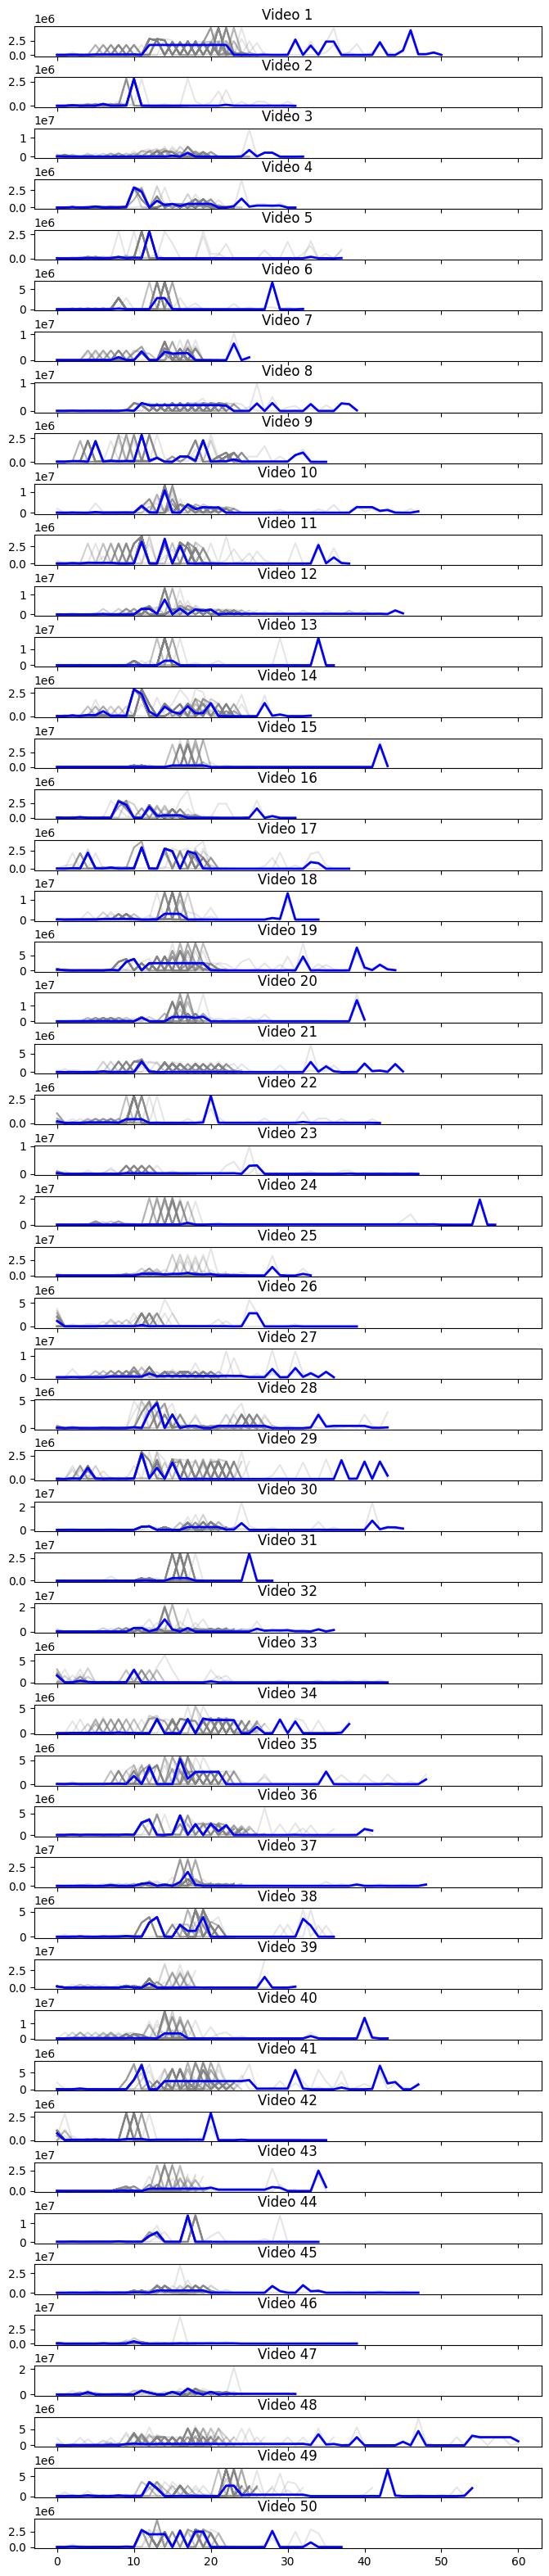


----------------------------bpi-----------------------------------


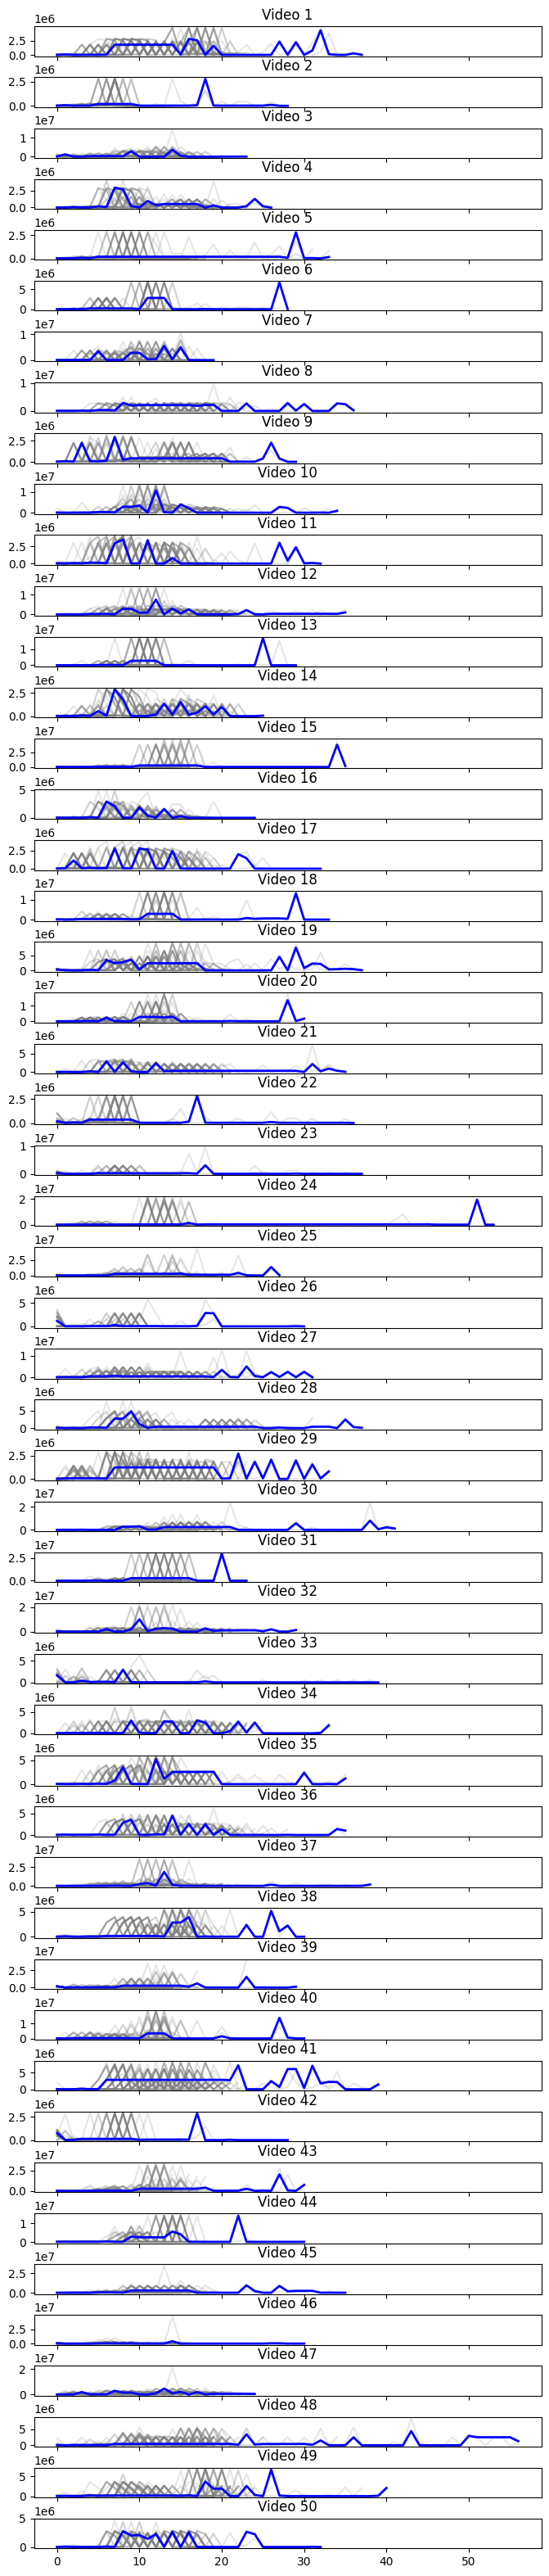


----------------------------SF-----------------------------------


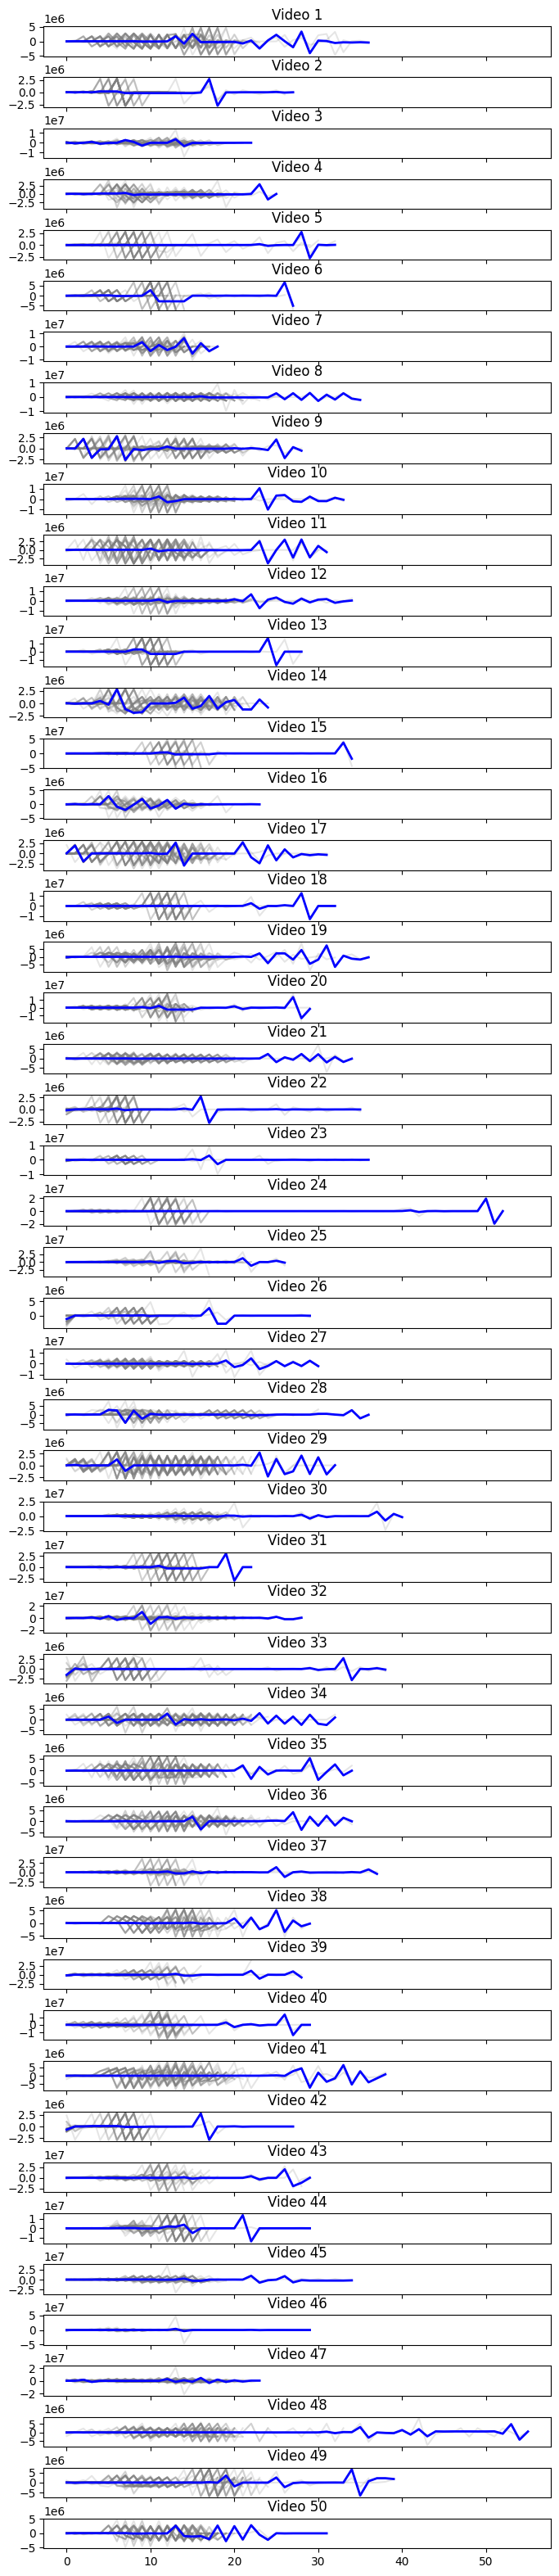


----------------------------DF-----------------------------------


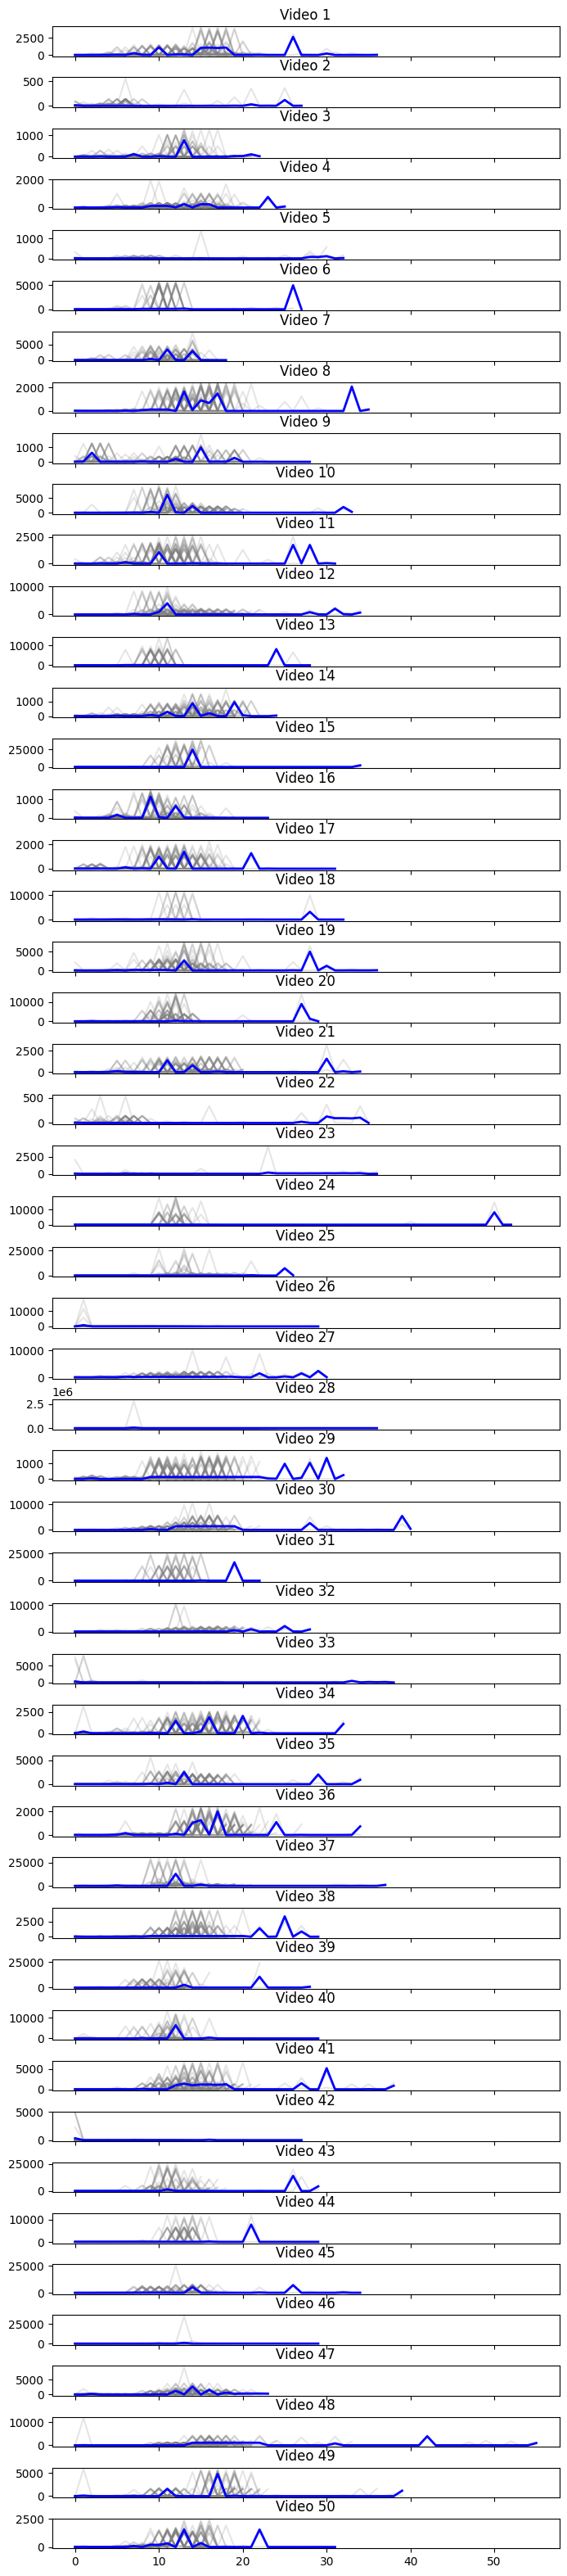


----------------------------NDF-----------------------------------


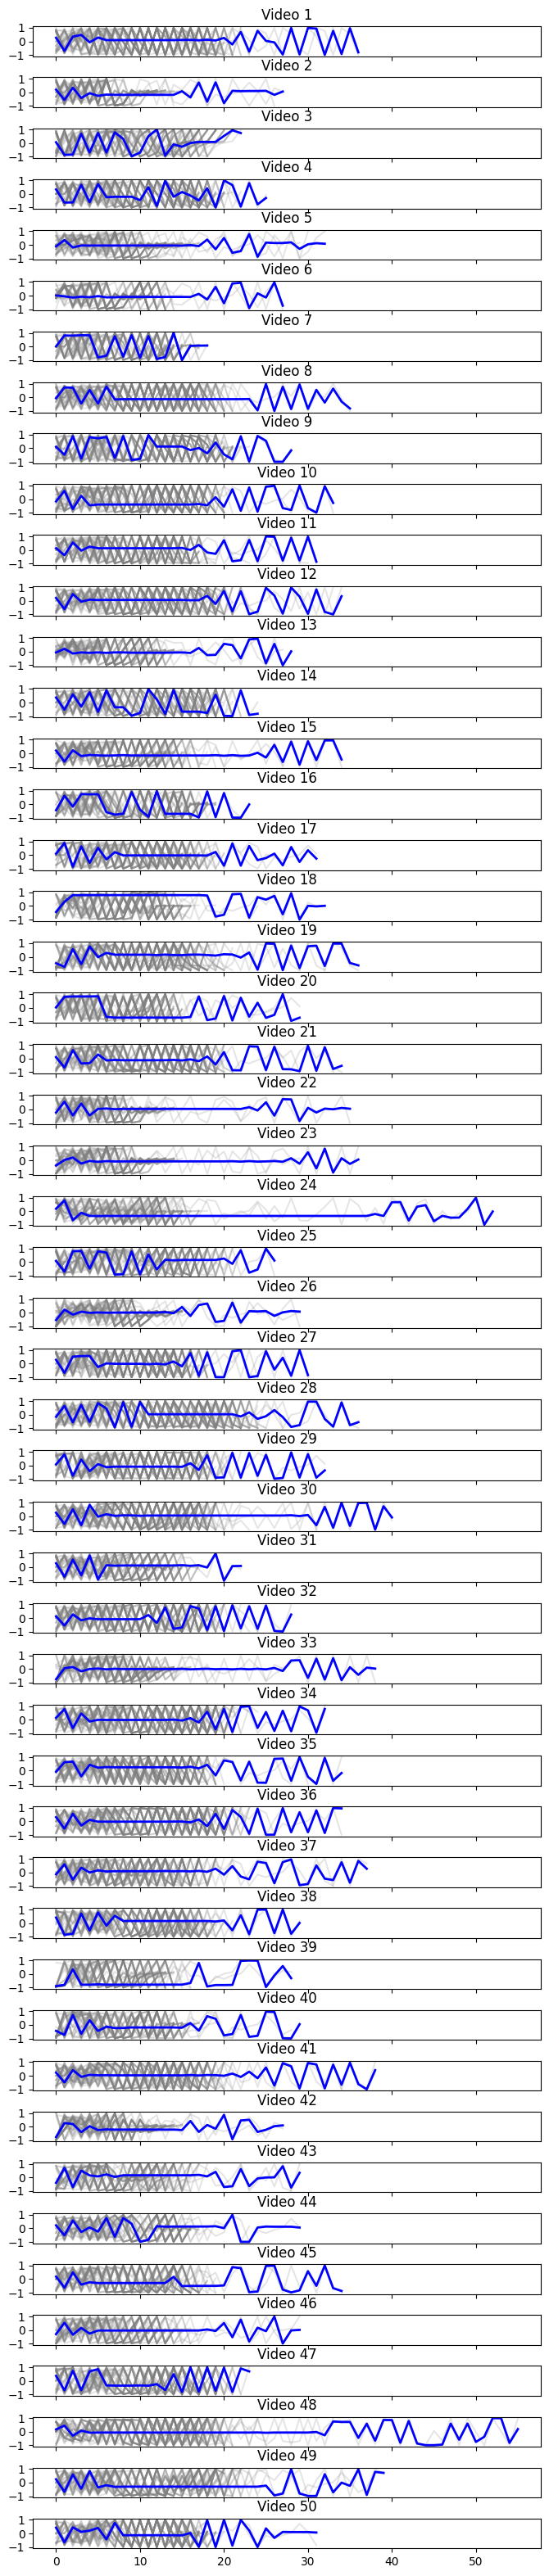


----------------------------AF-----------------------------------


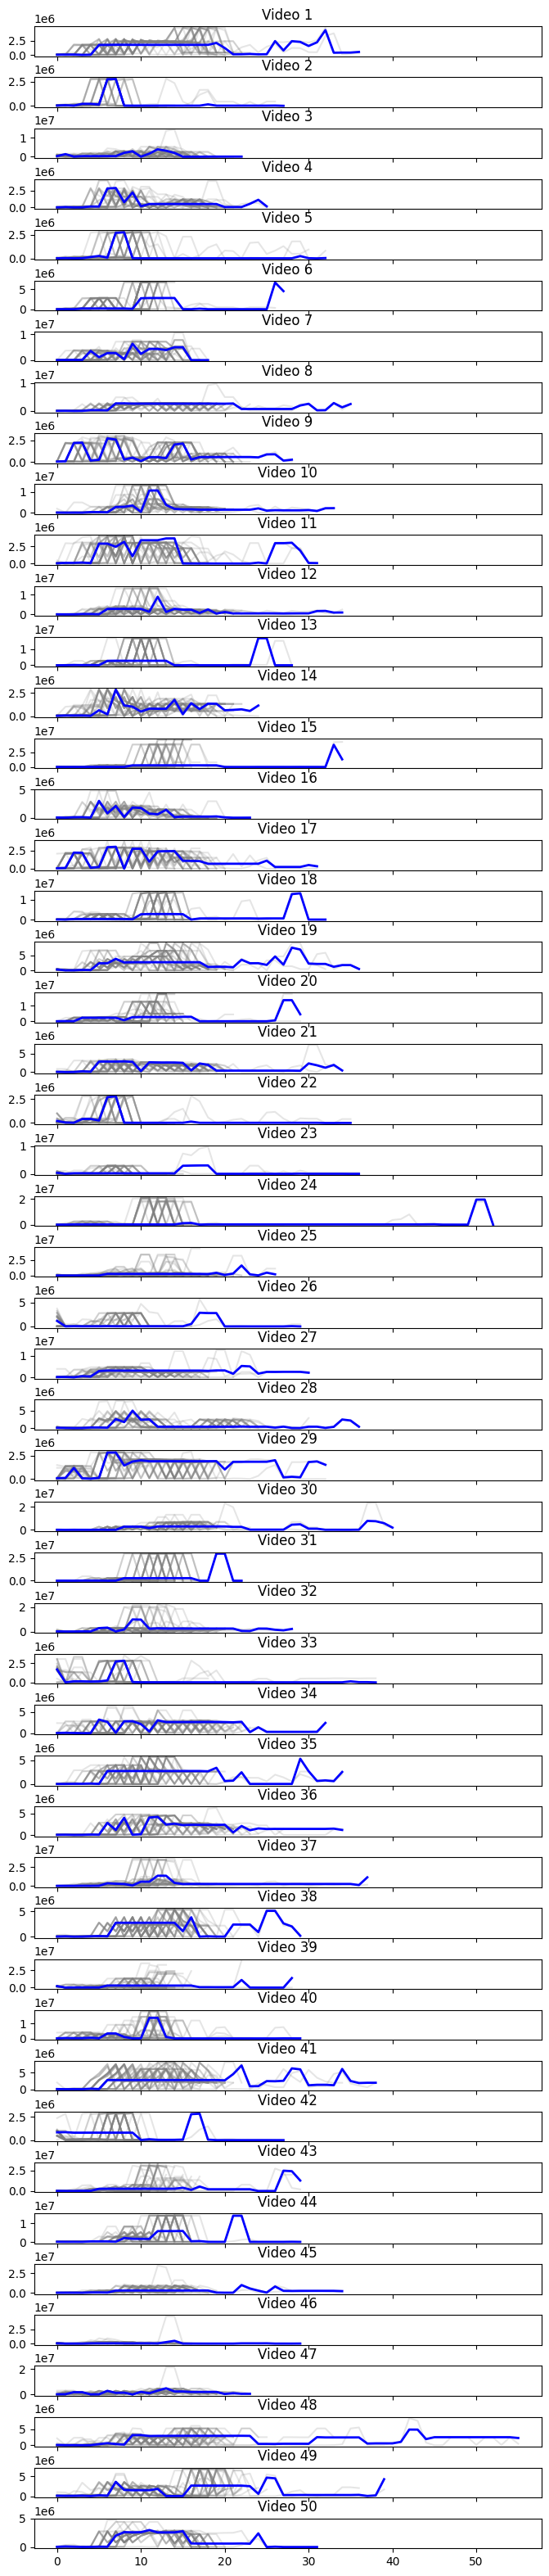

In [ ]:
for f in features: 
    print()
    title = f"----------------------------{f}-----------------------------------"
    plot_barycenters(sequences=bc_data[f].to_list(), sequences_names=bc_data.video_title.tolist(), title=title)

In [ ]:
def stretch_measures_to_seconds(timestamps, bpi):
    result = np.zeros(120)
    result[0] = bpi[0]
    diff = 0
    last_idx = 0
    for i in range(1,len(bpi)-2):
        diff_to_last = int((timestamps[i]-timestamps[i-1]).seconds)
        print("Range: ", diff_to_last)
        diff+=diff_to_last
        idx = last_idx+diff_to_last
        if idx<120:
            result[idx] = bpi[i]
            last_idx = idx
    print("Total Diff: ", diff)
    return result


In [ ]:
bps = cw.iloc[0:10][["timestamp", "data"]].apply(lambda row: stretch_measures_to_seconds(row["timestamp"], row["data"]), axis=1)
bps


Range:  0
Range:  10
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  6
Range:  10
Range:  10
Range:  7
Range:  2
Range:  14
Range:  5
Range:  10
Range:  19
Range:  8
Total Diff:  101
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  7
Range:  10
Range:  11
Range:  6
Range:  2
Range:  13
Range:  5
Range:  9
Range:  19
Range:  7
Range:  2
Range:  20
Total Diff:  111
Range:  10
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  7
Range:  10
Range:  11
Range:  7
Range:  2
Range:  12
Range:  5
Range:  11
Range:  11
Range:  3
Range:  11
Range:  2
Total Diff:  102
Range:  10
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  0
Range:  6
Range:  10
Range:  10
Range:  7
Range:  1
Range:  13
Range:  5
Range:  9
Range: 

0    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
1    [20191.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 278991...
2    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
3    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
4    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
5    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
6    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
7    [72784.0, 2412.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0...
8    [20189.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 279063...
9    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
dtype: object

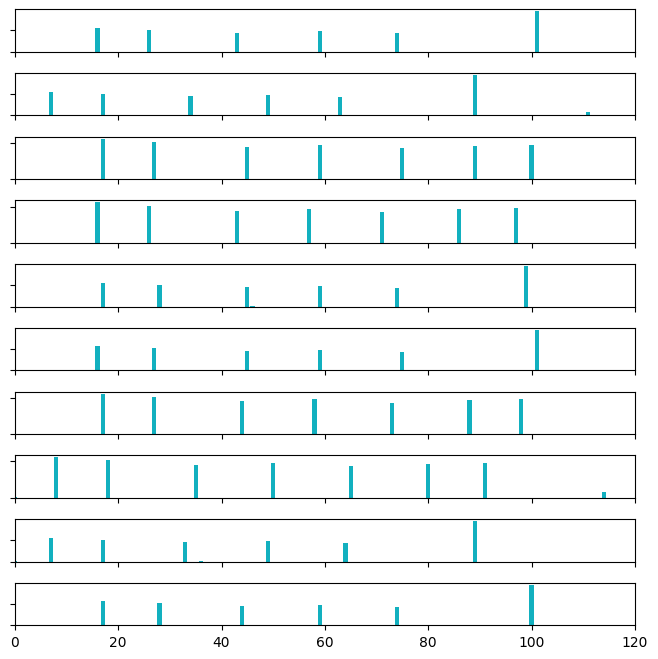

In [ ]:
show_traces(bps)